# Overview of ROC-AUC curves:

**ROC (Receiver Operating Characteristic)** curve and **AUC (Area Under the Curve)** are commonly used evaluation metrics in binary classification tasks. They help us assess the performance of a Machine Learning model by analyzing its ability to distinguish between the positive and negative classes.

When we make predictions with a binary classifier, we usually get probabilities as outputs, indicating the <u>likelihood of an instance belonging to the positive class</u>. By varying the *classification threshold* (the probability threshold above which we consider an instance as positive: $0.5$ in many default cases ), **we can trade off between True Positive Rate (sensitivity or recall) and False Positive Rate**.

### <span style="font-size: 11pt; color:steelblue; weight: normal">**ROC (Receiver Operating Characteristic) curve**</span>:
The **ROC curve** <u>is created by plotting the true positive rate (TPR) on the y-axis and the false positive rate (FPR) on the x-axis</u>, <span style="font-size: 11pt; color:mediumseagreen; weight: normal">**as we change the classification threshold from 0 to 1**</span>. 

Each point on the ROC curve represents a different threshold, and it shows how well the model can distinguish between the two classes at different cutoff points.
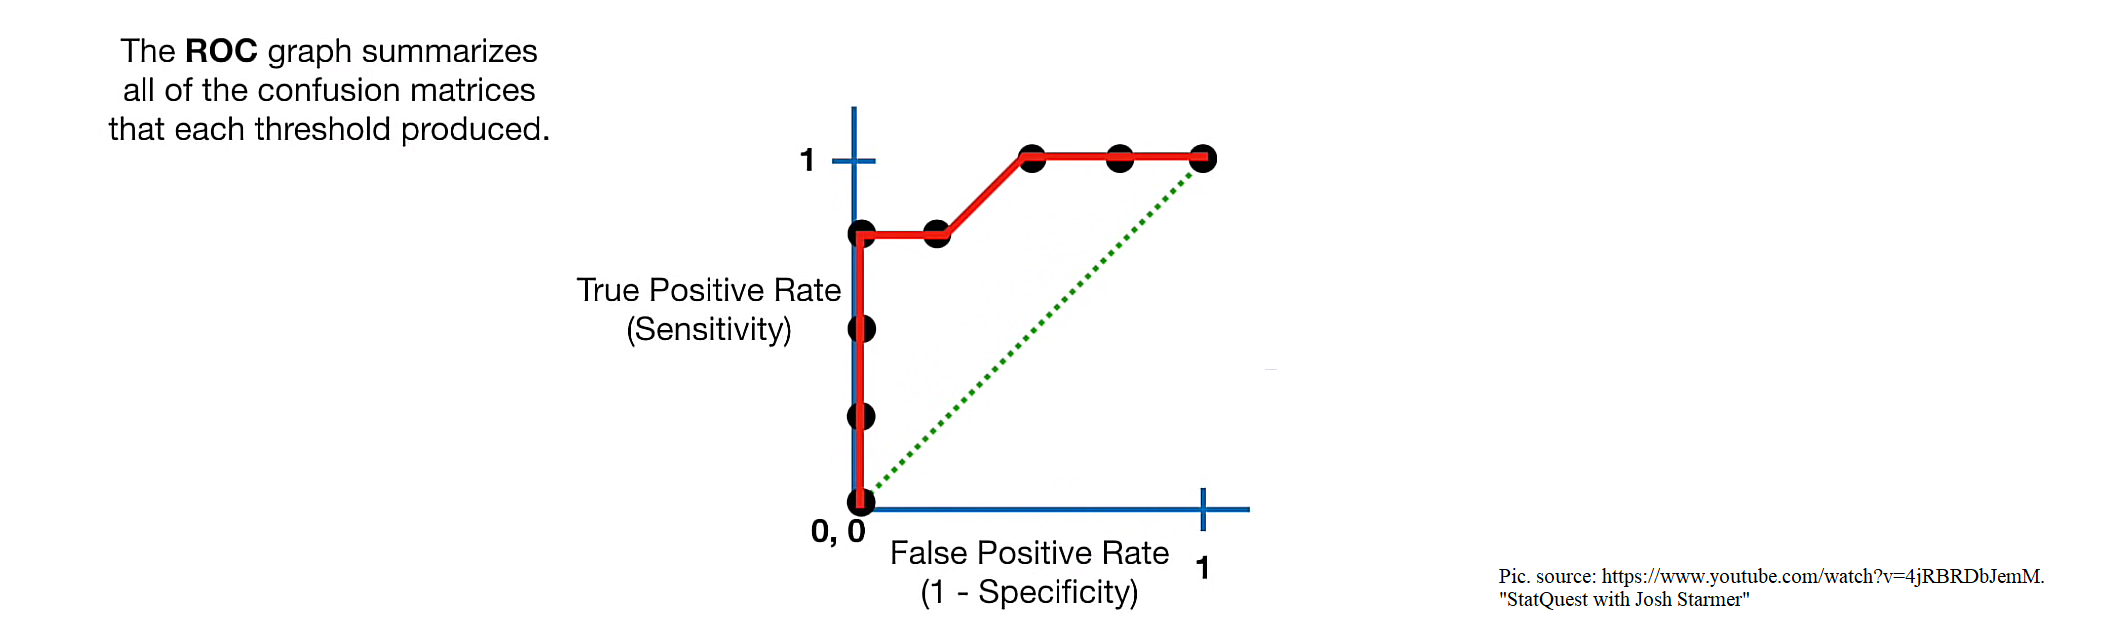
***
The ROC curve was developed during World War II to analyze radar signals and was later adopted in the field of signal detection theory. In the 1950s and 1960s, it gained prominence in the medical field for diagnostic testing and has since become a widely used evaluation metric in various machine learning and classification tasks.
***

#### <span style="font-size: 11pt; color:steelblue; weight: normal">**True Positive Rate and False Positive Rate**</span>:

- **True Positive Rate (TPR)**: TPR, also known as Sensitivity or Recall, <span style="font-size: 11pt; color:mediumseagreen; weight: normal">**is the proportion of positive instances correctly identified as positive by a binary classifier**</span>. It measures the model's ability to correctly detect positive instances from the total actual positive instances.

- **False Positive Rate (FPR)**: FPR <span style="font-size: 11pt; color:tomato; weight: normal">**is the proportion of negative instances that are incorrectly classified as positive by a binary classifier**</span>. It measures the model's tendency to produce false alarms by predicting positive instances when they actually belong to the negative class.

**True Positive Rate** (TPR) and **False Positive Rate** (FPR) can be calculated using the information from the **confusion matrix**, which is a table used to evaluate the performance of a binary classification model.  

The **Confusion Matrix** consists of four values based on the comparison between the predicted and actual class labels:

| Actual/Predicted | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| Actual Positive  |       TP           |       FN           |
| Actual Negative  |       FP           |       TN           |

One of the many ways to create the confusion matrix is with the help of sklearn library:
```python
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_true, y_pred,
```
Then, True Positive and False Positive rates are calculated as follows:
- $\text{TPR (sensitivity, recall)} = \frac{TP}{TP + FN}$  
- $\text{FPR} = \frac{FP}{FP + TN}$

#### <span style="font-size: 11pt; color:steelblue; weight: normal">**Area Under the Curve**</span>:
The AUC is the area under the ROC curve, which ranges between 0 and 1. 
- **An AUC of 1** indicates the perfect classifier, that can perfectly distinguish between the positive and negative classes. 
- **An AUC of 0.5** suggests that the classifier performs no better than random guessing 
- **An AUC below 0.** means the model is performing worse than random guessing.

AUC is a useful metric when dealing with imbalanced datasets, as it measures the model's ability to rank positive instances higher than negative instances.

<span style="font-size: 11pt; color: goldenrod; font-weight: normal">**Calculating AUC for ROC curves of different  classification models is an efficient way to compare their perfomances**</span>.  
And this is exactly what we are going to do in the following worked example!

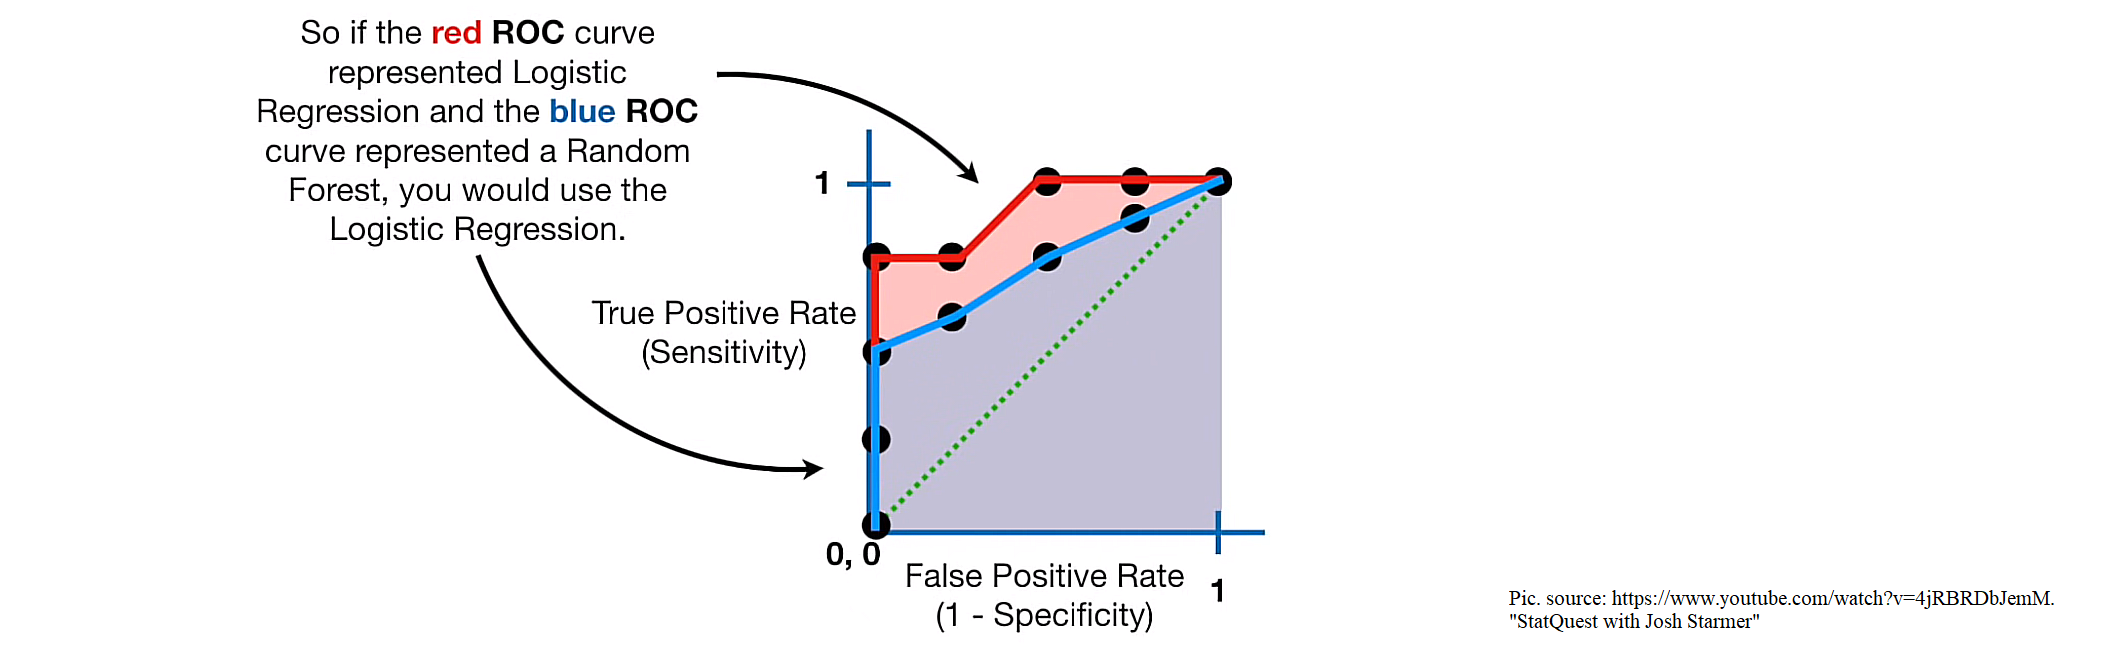




# Worked example
In this example, we will evaluate the "*out-of-the-box*" performance of two classification models implemented with the help of **scikit-learn** library: the **DecisionTree Classifier** and **Logistic Regression**, for a binary classification task. Instead of diving into extensive model tuning, we will focus on their initial performance using synthetic data generated by the `make_classification` function from **sklearn**.

By analyzing the ROC curves produced by each model's predictions and areas under the corresponding curves (AUC), we aim to gain valuable insights into their abilities to distinguish between the positive and negative classes. While our approach does not involve fine-tuning the models, <u>it allows us to make an informed decision about which model exhibits greater accuracy in this specific scenario</u>.

### Implementation
To create an ROC curve and calculate the AUC, we should follow these general steps:

1. Train binary classification model using the training data.
2. Make predictions on the test data and obtain the probabilities for each instance.
3. Sort the instances based on their predicted probabilities in descending order.
4. Initialize the ROC curve with the point (0, 0) (FPR = 0, TPR = 0).
5. For each instance in the sorted list, calculate the true positive rate (TPR) and false positive rate (FPR) at the current threshold and add a point to the ROC curve.
6. Calculate the AUC by summing the areas under the trapezoids formed by adjacent ROC curve points.

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

RANDOM_STATE = 42

### Generate synthetic data for classification task

In [2]:
# Generate synthetic data for example
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression Classifier training and predictions

In [3]:
# Train a Logistic Regression Classifier on the training set
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

# Predict probabilities for the test set
probs_lr = classifier_lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

### DecisionTree Classifier training and predictions

In [4]:
# Train a DecisionTree Classifier on the training set
classifier_dt = DecisionTreeClassifier(random_state=RANDOM_STATE) # random_state for reproducibility
classifier_dt.fit(X_train, y_train)

# Predict probabilities for the test set
probs_dt = classifier_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

### Plotting the results

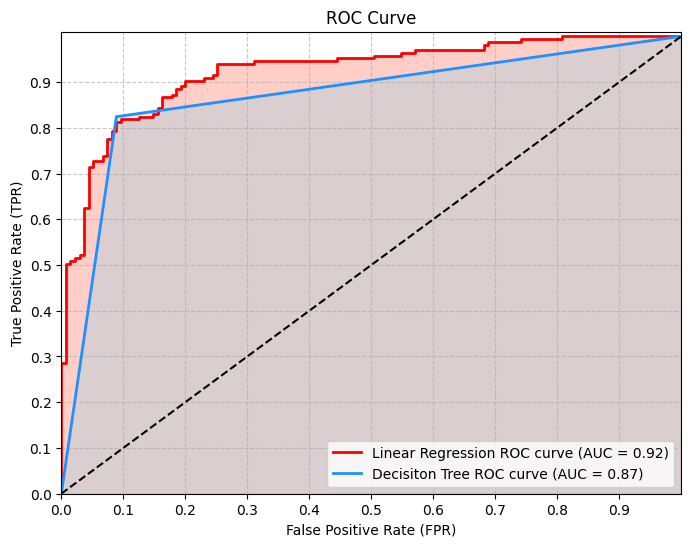

In [5]:
# Plot the ROC curve for LogisticRegression and DecisionTree classifiers
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Linear Regression ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='dodgerblue', lw=2, label='Decisiton Tree ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='k', linestyle='--')

# Visualizing AUC
plt.fill_between(fpr_lr, tpr_lr, color='tomato', alpha=0.3)  # Fill LinearRegression AUC
plt.fill_between(fpr_dt, tpr_dt, color='skyblue', alpha=0.3)  # Fill DecisionTree AUC

# Plot customization
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, ls='dashed', alpha=0.7)
plt.xticks(np.arange(0,1,0.1))
plt.xlim([0.0, 1.0])
plt.yticks(np.arange(0,1,0.1))
plt.ylim([0.0, 1.01])

plt.show()

# Conclusion

Overall, as we can see, LinearRegression and DecisionTree models with default ("out-of-the-box") from `sklearn` <span style="font-size: 11pt; color:steelblue; weight: normal">**produced almost identical ROC-AUC plots**</span>, with values of $0.92$ and $0.87$ respectively on the given synthetic data.

One thing that we can notice from this ROC–AUC plot, is that the **LinearRegression** seems to be able to achieve higher **True Positive Rates** when the False Positive Rate is in the range $[0.15:0.5]$, which might be beneficial for us, <u>if we are willing to accept more False Positive predictions to achieve higher Recall rates</u>.